# Домашнее задание "Теория вероятности. Непрерывные Случайные Величины".

## Уровень 0:

- Задание 1:


Получить интуицию, на что влияют параметры распределений. Построить по 5 функций плотностей с разными параметрами для каждого распределения: нормальное, экспоненциальное, Стьюдента на одном графике.


In [13]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np

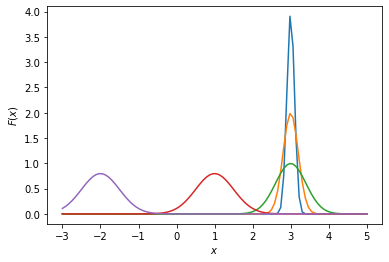

In [48]:
mu =    [3,   3,   3, 1,   -2]
sigma = [0.1, 0.2, 0.4, 0.5, 0.5]
x = np.linspace(-3, 5, 100)

for i in range(5):
    norm_rv = stats.norm(loc=mu[i], scale=sigma[i])
    pdf = norm_rv.pdf(x)
    plt.plot(x, pdf)

plt.ylabel('$F(x)$')
plt.xlabel('$x$')
plt.show()

Наблюдаем, что мат. ожидание (параметр loc функции norm) задаёт "центр" графика, точку, в которой функция плотности принимает максимальное значение и относительно которой график симметричен. Параметр scale (дисперсия распределения) задаёт само значение максимума, т. е. при увеличении сигмы график растягивается в стороны ("сплющивается"), при уменьшении - вытягивается вверх, возникает резкий пик.

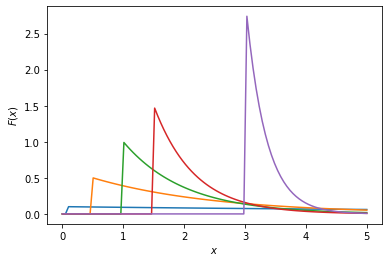

In [58]:
lam = [0.1, 0.5, 1.0, 1.5, 3]

x = np.linspace(0, 5, 100)

for i in range(5):
    expon_rv = stats.expon(loc = lam[i], scale = 1/lam[i])
    pdf = expon_rv.pdf(x)
    plt.plot(x, pdf)

plt.ylabel('$F(x)$')
plt.xlabel('$x$')
plt.show()

В данном случае параметр lambda задаёт одновременно и смещение графика, и его масштаб по оси Y (это следует из аналитической записи функции плотности распределения: $f(x) = \lambda e^{-\lambda x}$)

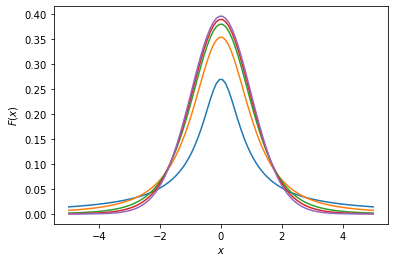

In [62]:
lam = [0.5, 2, 5, 10, 30]

x = np.linspace(-5, 5, 100)

for i in range(5):
    t_rv = stats.t(lam[i])
    pdf = t_rv.pdf(x)
    plt.plot(x, pdf)

plt.ylabel('$F(x)$')
plt.xlabel('$x$')
plt.show()

График функции плотности распределения Стьюдента (t-распределения), также как и график функции плотности нормального распределения, имеет форму колокола (но ниже и с более широкими боками), симметричен и при увеличении числа степений свободы стремится к графику нормального распределения.

## Уровень 1:

- Задание 2

Непрерывная случайная величина задана плотностью распределения:$$ f(\xi) = C, \xi \in [0;5];f(\xi) = 0, \xi \notin [0;5]$$Найдите C, математическое ожидание $\xi$ а также вероятность попадания  в отрезок $[3.5;7]$, т.е. P(3.5 &lt; $\xi$ &lt; 7).

Т. к. $\int_{-\infty}^{\infty} f(x) \,dx = 1$, то <br>
$\int_{-\infty}^{0} 0\,dx + C \int_{0}^{5}\,dx + \int_{5}^{\infty} 0\,dx = 1$ <br>
$ C \int_{0}^{5} \,dx = 1$ <br>
$ C \cdot x |_0^5 = 1 $ <br>
$ C \cdot 5 = 1 $ <br>
$ C = 0.2 $ <br>

Составим функцию распределения вероятностей $F(x) = \int_{-\infty}^{\infty} f(x) \,dx$ <br>
$x <= 0: f(x) = 0, F(x) = \int_{-\infty}^{x} 0\,dx = 0$ <br>
$0 < x < 5: f(x) = 0.2, F(x) = \int_{-\infty}^{0} 0\,dx + 0.2 \int_{0}^{x}\,dx = 0 + 0.2(x)|_0^x = 0.2x$ <br>
$x >= 5: f(x) = 0, F(x) = \int_{-\infty}^{0} 0\,dx + 0.2 \int_{0}^{5}\,dx + \int_{5}^{x} 0\,dx = 0 + 0.2(x)|_0^5 + 0 = 0.2 \cdot 5 = 1$

$ P(3.5 < x < 7) = F(7) - F(3.5) = 1 - 0.2 \cdot 3.5 = 0.7 $ 

- Задание 3


Известно, что светофор горит 54 секунды красным, 4 секунды жёлтым и 28 секунд зелёным. Посчитайте, какое количество информации несёт сообщение о цвете светофора в текущий момент. А что будет в случае 28, 28 и 28 секунд для каждого цвета?

Цикл горения светофора повторяется каждые 54 + 4 + 28 = 86 секунд. Из них красный горит p1 = 54/86 времени, жёлтый p2 = 4/86, зелёный p3 = 28/86. Тогда по формуле Шеннона количество информации I равно $I = -(p_1log_2p_1 + p_2log_2p_2 +p_3log_2p_3)$

In [66]:
import math

p1 = 54/86
p2 = 4/86
p3 = 28/86
-(math.log2(p1) * p1 + math.log2(p2) * p2 + math.log2(p3) * p3)

1.154522162441165

Получается, в сообщении о цвете светофора содержится ~1.15 бит информации. Во втором случае:

In [67]:
p1 = 28/84
p2 = 28/84
p3 = 28/84
-(math.log2(p1) * p1 + math.log2(p2) * p2 + math.log2(p3) * p3)

1.584962500721156

В этом случае ~1.58 бит информации.